In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

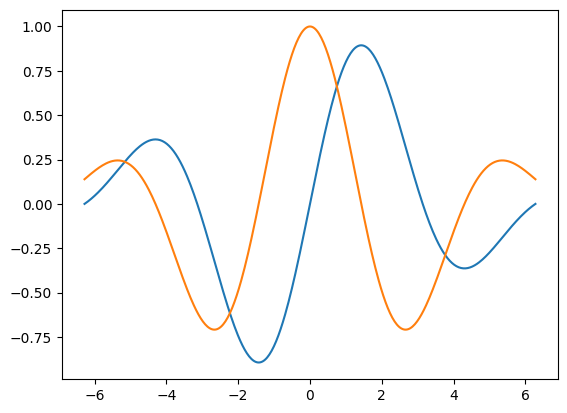

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*.05)

df = np.cos(x) * np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

plt.plot(x, fx, x, df)
plt.show()

In [4]:
def fx(x):
    return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
    return np.cos(x) * np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

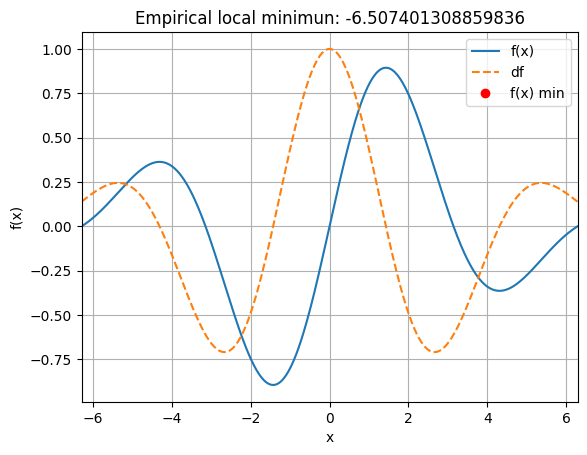

In [5]:
localmin = np.random.choice(x, 1)

learning_rate = 0.01
train_count = 1000

for i in range(train_count):
    grad = deriv(localmin)
    localmin = localmin - grad*learning_rate

plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Empirical local minimun: %s'%localmin[0])
plt.show()

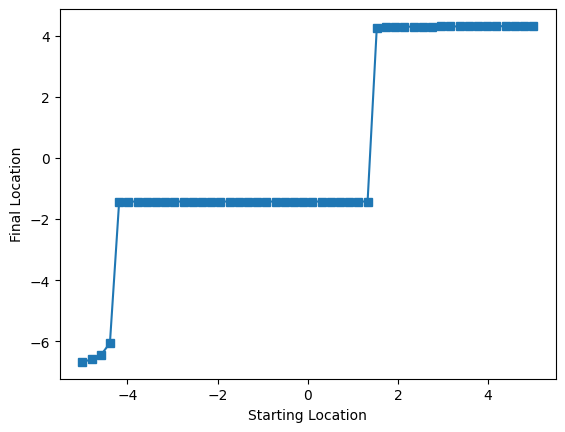

In [6]:
startlocs = np.linspace(-5,5, 50)
finalres = np.zeros(len(startlocs))

for idx, localmin in enumerate(startlocs):
    for i in range(train_count):
        grad = deriv(localmin)
        localmin = localmin - grad*learning_rate
    
    finalres[idx] = localmin

plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting Location')
plt.ylabel('Final Location')
plt.show()

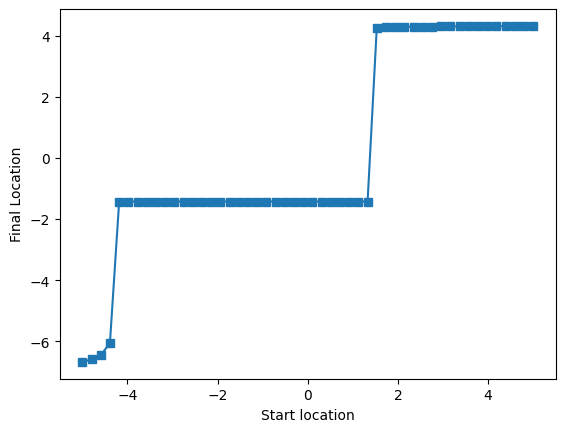

In [7]:
a = np.linspace(-5,5,50)
b = np.zeros(len(a))

for idx, localmin in enumerate(a):
    for i in range(train_count):
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad
    b[idx] = localmin
plt.plot(a, b, 's-')
plt.xlabel('Start location')
plt.ylabel('Final Location')
plt.show()

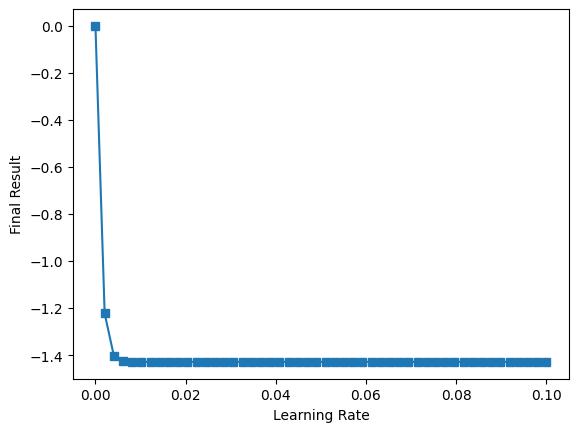

In [8]:
learning_rates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learning_rates))

for idx, learningRate in enumerate(learning_rates):
    localmin = 0
    for i in range(train_count):
        grad = deriv(localmin)
        localmin = localmin - grad*learningRate

    finalres[idx] = localmin

plt.plot(learning_rates, finalres, 's-')
plt.xlabel('Learning Rate')
plt.ylabel('Final Result')
plt.show()

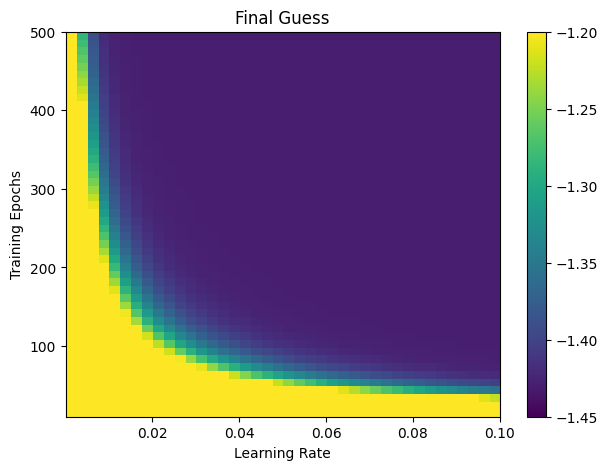

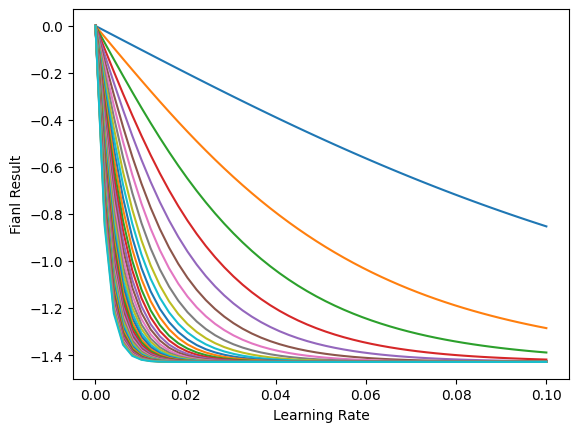

In [9]:
learning_rates = np.linspace(1e-10, 1e-1, 50)
train_counts = np.round(np.linspace(10,500,40))

finalres = np.zeros((len(learning_rates), len(train_counts)))

for lidx, learningRate in enumerate(learning_rates):

    for tidx, train_count in enumerate(train_counts):
        localmin = 0
        for i in range(int(train_count)):
            grad = deriv(localmin)
            localmin = localmin - grad*learningRate

        finalres[lidx, tidx] = localmin

fig, ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres, extent=[learning_rates[0], learning_rates[-1], train_counts[0], train_counts[-1]], aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)
plt.xlabel('Learning Rate')
plt.ylabel('Training Epochs')
plt.title('Final Guess')
plt.colorbar()
plt.show()


plt.plot(learning_rates, finalres)
plt.xlabel('Learning Rate')
plt.ylabel('Fianl Result')
plt.show()

In [10]:
finalres[0, 0:2]

array([-1.0e-09, -2.3e-09])